# This notebook is used for evaluating an instance of BagBoost Experiment. 

This expierments has uses bagboost. 

In [3]:
import pandas as pd 
import numpy as np
import os 
import sys 
#sys.path.append("/")
target_job = '4079920'

In [4]:
# First 
from code.data_processing import get_all_datasets
x = get_all_datasets()

In [5]:
# First 
from code.data_processing import get_all_datasets

names = {} # index to string of names
datasets = get_all_datasets()
models = ['bag_model', 'nich_model', 'ccgp']
for i,model in enumerate(models):
    for j, dataset in enumerate(datasets):
        names[(i * len(datasets)) + j + 1] = f'{model}{dataset}'
print(names.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])


In [6]:
# First load data in 
data = {}
for fn in os.listdir(f'results_file/{target_job}/'):
    fn2 = os.listdir(f'results_file/{target_job}/{fn}/')[0] # currently these files only have one entry
    f = f'results_file/{target_job}/{fn}/{fn2}'
    data[int(fn)] = pd.read_csv(f, index_col=False)
print(f'Number of results files in job {target_job} = {len(data)}')

Number of results files in job 4079920 = 29


In [7]:
data[18]

,member_generation,training,seed,time,full_acc,majority_acc,minority_acc,tn,fp,fn,tp
0,True,True,0,752.183603,0.278689,1.0,0.000000,-1,-1,-1,-1
1,True,False,0,752.183603,0.259259,1.0,0.000000,-1,-1,-1,-1
2,False,True,0,6.787077,0.721311,0.0,1.000000,-1,-1,-1,-1
3,False,False,0,6.787077,0.740741,0.0,1.000000,-1,-1,-1,-1
4,True,True,169,703.732786,0.278689,1.0,0.000000,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
115,False,False,4732,4.508998,0.703704,0.0,0.950000,-1,-1,-1,-1
116,True,True,4901,764.316531,0.278689,1.0,0.000000,-1,-1,-1,-1
117,True,False,4901,764.316531,0.259259,1.0,0.000000,-1,-1,-1,-1
118,False,True,4901,4.917308,0.704918,0.0,0.977273,-1,-1,-1,-1


In [8]:
# method to efficently grab correct subsections from 
def get_data(task_id, member_generation=False, training=False, numpy=False):
    x = data[task_id]
    x = x[x['member_generation'] == member_generation] 
    if numpy:
        x = x[x['training'] == training].to_numpy() # [final]
    else:
        x = x[x['training'] == training] # [final]
    return x

<AxesSubplot:xlabel='majority_acc', ylabel='minority_acc'>

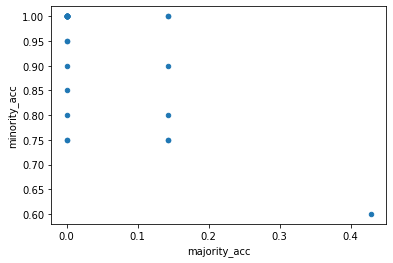

In [9]:
get_data(18).plot.scatter(x='majority_acc', y='minority_acc') 

In [10]:
# Get the description for each. 
data2= []
for key in data.keys():
    try:
        data2.append(get_data(key)['full_acc'].describe())
    except:
        pass

description = pd.DataFrame(data=data2)
description = description.reset_index()
description = description.drop(columns='index')
name_dict = {}
i = 0
for model in models:
    for dataset in datasets:
        name_dict[i] = dataset+'_'+model
        i += 1
description.rename(index=name_dict, inplace=True)
description

,count,mean,std,min,25%,50%,75%,max
cleveland_bag_model,30.0,0.665021,5.613045e-02,0.567901,0.620370,0.666667,0.703704,0.777778
ionosphere_bag_model,30.0,0.696296,7.107598e-02,0.555556,0.638889,0.740741,0.740741,0.777778
ecoli_bag_model,30.0,0.728519,5.877154e-02,0.611111,0.688889,0.738889,0.775000,0.811111
iris_bag_model,30.0,0.853623,2.896190e-02,0.753623,0.840580,0.850242,0.869565,0.917874
mammo_graphic_bag_model,30.0,0.313752,1.855789e-03,0.309417,0.311659,0.313901,0.315583,0.316143
wisconsin_breast_cancer_bag_model,30.0,0.953821,2.188040e-02,0.897561,0.936585,0.956098,0.970732,0.980488
australia_bag_model,30.0,0.606173,9.200752e-02,0.333333,0.555556,0.592593,0.666667,0.740741
postop_bag_model,30.0,0.775040,4.997436e-02,0.661836,0.754831,0.770531,0.805556,0.864734
yeast_bag_model,30.0,0.793333,4.535466e-02,0.655556,0.777778,0.788889,0.822222,0.866667
spec_bag_model,30.0,0.629703,4.049860e-02,0.435644,0.633663,0.633663,0.643564,0.653465


# Analysis of the description

This table shows the performance of the bag model on each dataset. Important aspects:
- yeast and spec both have the same accuracy within the quantiles, this suggests the model isn't correct. Potentially it only outputs 0 or 1. 
- The performance is not particularly impressive, maybe tuning the hyper parameters could be useful


